# ST2195 Coursework Project - Part 1 

PART 1 B)

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Obtaining the 'hat' symbol for R
print("R\u0302")

R̂


In [3]:
#Taking N = 2000, s = 0.001, and J = 4
N = 2000
s = 0.001
J = 4
s_list = np.linspace(0.001, 1, 200)
#Array containing 200 s values equally spaced between 0.001 and 1 (inclusive).

In [4]:
#Defining the function calc_R̂ under the parameters (N,s,J)
def calc_R̂(N, s, J):
    chains_list = []            #A list to store the generated chains
    for i in range(J):
        x = np.random.randn()   #Generating random number x from standard normal distribution
        chain = [x]             #Chain with initial value as x
        for j in range(1, N):
            #Generating a new value n from normal distribution with mean x and std_dev s
            n = np.random.normal(loc=x, scale=s)
            #Calculating the acceptance probability A where A = min(1,f(x(n))/f(x(x)))
            A = min(1, np.exp(-0.5 * (n ** 2 - x ** 2)))
            if np.random.uniform() < A: #If condition to accept or reject the new value n
                x = n
            chain.append(x)        #Append x to the chain after accepting/rejecting n
        chains_list.append(chain)  #Adding the completed chain to the list of chains

    #R̂ calculation procedure when N=2000, s=0.001, and J=4.
    Mj = np.mean( chains_list, axis=1) #Sample mean of chain j
    
    Vj = np.var( chains_list, axis=1, ddof=1) #Within sample variance of chain j
    
    W = np.mean(Vj) #Overall within sample variance
    
    M = np.mean(Mj) #Overall sample mean
    
    B = np.mean((Mj - M) ** 2) #Sample variance
    
    R̂ = np.sqrt(B+W/W)
    
    return R̂

In [5]:
#R̂ calculation
R̂ = [calc_R̂(N, s, J)] 
print(R̂)

[1.1557654972974798]


In [6]:
#Calculating the variation of R̂ for s_list
R̂_values = [calc_R̂(N, s, J) for s in s_list]

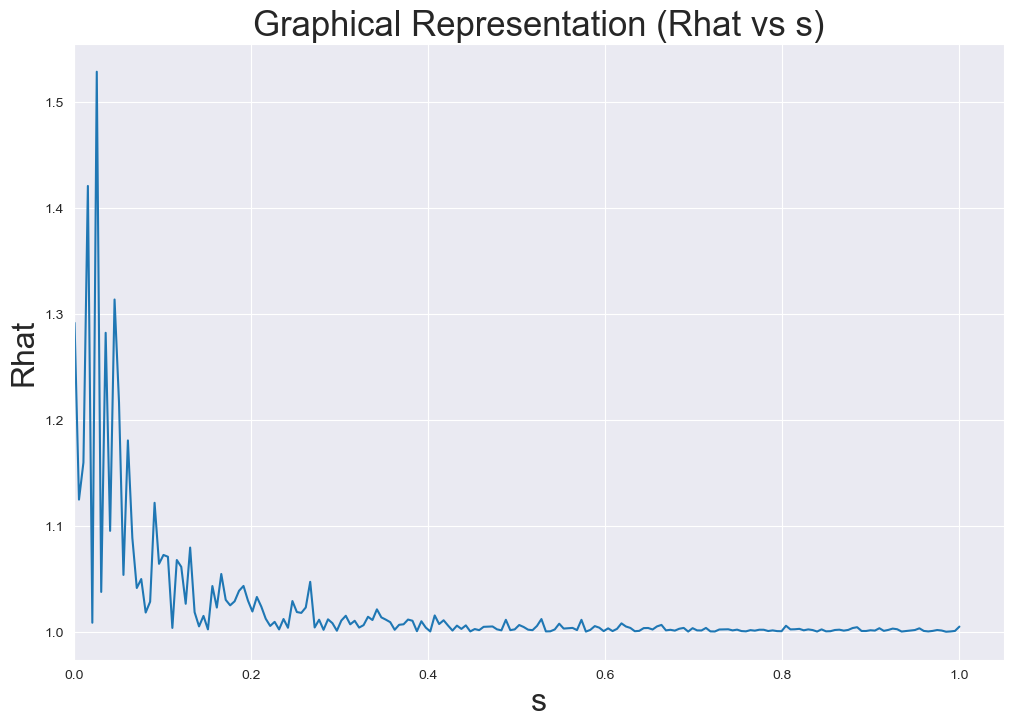

In [7]:
#Graphical representation of the variation of R̂ over s
#Note: Rhat will be used to represent R̂ on the graph
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
#Plotting the lineplot
sns.lineplot(x=s_list, y=R̂_values)
plt.xlabel('s', fontsize=23)
plt.ylabel('Rhat', fontsize=23)
plt.title('Graphical Representation (Rhat vs s)', fontsize=25)
plt.xlim(left=0)
plt.show()

The graph indicates covergence.

---